# Importing Dependencies

In [1]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the dataset

In [2]:
# Load and preprocess the dataset
def load_dataset():
    dataset_path = r"C:\Users\HP\Desktop\project for old CV methods\Data"
    labels = os.listdir(dataset_path)
    sift = cv2.SIFT_create(40)
    all_descriptors = []
    all_labels = []


    for label in labels:
        label_path = os.path.join(dataset_path, label)
        descriptors_per_label = []
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            _, descriptors = sift.detectAndCompute(img, None)
            descriptors = np.sum(descriptors, axis=0)  # columns wise adding
            descriptors = descriptors/(np.linalg.norm(descriptors) + 1e-6)
            all_descriptors.append(descriptors)
            all_labels.append(label)
                              
    return np.array(all_descriptors), all_labels

X, y = load_dataset()

# Preprocessing and Train-Test split

In [3]:
# Create a mapping from string labels to numeric labels
label_mapping = {label: index for index, label in enumerate(set(y))}

# Convert string labels to numeric labels using the mapping
numeric_y = [label_mapping[label] for label in y]

# Reshape the data to a 2D array (required by the encoder)
y = [[i] for i in numeric_y]

train_data1, test_data1, train_labels1, test_labels1 = train_test_split(X, y,
                                                                        random_state=42, test_size=0.20,shuffle=True)

# Model Creation

In [4]:
# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(C=1.0, kernel='linear', gamma='scale', probability=True, decision_function_shape='ovr')
svm_classifier.fit(train_data1, train_labels1)

# Make predictions on the test set
y_pred = svm_classifier.predict(test_data1)

# Calculate accuracy
accuracy = accuracy_score(test_labels1, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 51.34%


# Visualization

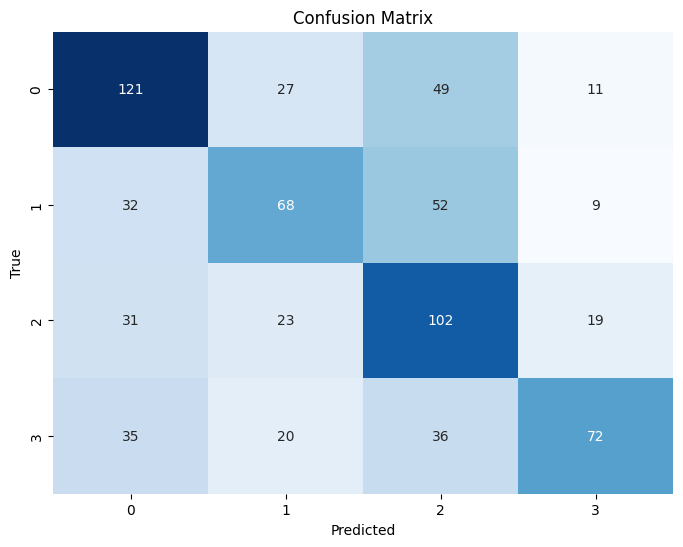

In [5]:
# Confusion Metrics
predictions = svm_classifier.predict(test_data1)
cm = confusion_matrix(test_labels1, predictions)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()